In [1]:
import os
import random
import shutil
import os
import tensorflow as tf
import zipfile
from sklearn.model_selection import train_test_split

In [2]:
def split_data1(SOURCE, TRAINING, TESTING, SPLIT_SIZE):


  shuffled_source = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))


  training_number = int(len(shuffled_source) * SPLIT_SIZE)

  i = 0
  target = TRAINING

  for item in shuffled_source:
    item_source = os.path.join(SOURCE, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else:
      shutil.copyfile(item_source, os.path.join(target, item))
      i += 1


    if i == training_number:
      target = TESTING

In [3]:
training_dir = "/kaggle/input/split-dataset-human-ai-art-detection/split-data/Training"
validation_dir = "/kaggle/input/split-dataset-human-ai-art-detection/split-data/Validation"

train_ai_dir = os.path.join(training_dir, 'AI')
train_human_dir = os.path.join(training_dir, 'Non-AI')

val_human_dir = os.path.join(validation_dir, 'Non-AI')
val_ai_dir = os.path.join(validation_dir, 'AI')

train_ai_awal = os.listdir(train_ai_dir)
train_human_awal = os.listdir(train_human_dir)

val_human_awal = os.listdir(val_human_dir)
val_ai_awal = os.listdir(val_ai_dir)

random.shuffle(train_ai_awal)
random.shuffle(train_human_awal)
random.shuffle(val_human_awal)
random.shuffle(val_ai_awal)

train_ai = train_ai_awal[:20000]
train_human = train_human_awal[:20000]
val_human = val_human_awal[:2200]
val_ai = val_ai_awal[:2200]

print(f"There are {len(train_ai)} images of human art for training")
print(f"There are {len(train_human)} images of AI generated for training")
print(f"There are {len(val_human)} images of human art for validation")
print(f"There are {len(val_ai)} images of AI generated for validation")

There are 20000 images of human art for training
There are 20000 images of AI generated for training
There are 2200 images of human art for validation
There are 2200 images of AI generated for validation


In [4]:
TAI20k = "/kaggle/working/new-split-data/Training/AI"
TNAI20k = "/kaggle/working/new-split-data/Training/Non-AI"
VNAI2k = "/kaggle/working/new-split-data/Validation/Non-AI"
VAI2k = "/kaggle/working/new-split-data/Validation/AI"
os.makedirs(TAI20k, exist_ok=True)
os.makedirs(TNAI20k, exist_ok=True)
os.makedirs(VNAI2k, exist_ok=True)
os.makedirs(VAI2k, exist_ok=True)

In [5]:
test_ai = val_ai_awal[2201:]
test_human = val_human_awal[2201:]
TSTAI = "/kaggle/working/new-split-data/Testing/AI"
TSTNAI = "/kaggle/working/new-split-data/Testing/Non-AI"
os.makedirs(TSTAI, exist_ok=True)
os.makedirs(TSTNAI, exist_ok=True)
print(f"There are {len(test_human)} images of human art for testing")
print(f"There are {len(test_ai)} images of AI generated for testing")

There are 212 images of human art for testing
There are 50 images of AI generated for testing


In [6]:

train_ai_directories = [os.path.join(train_ai_dir, directory) for directory in train_ai]

for source_directory in train_ai_directories:
    destination_path = os.path.join("/kaggle/working/new-split-data/Training/AI", os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)


train_human_directories = [os.path.join(train_human_dir, directory) for directory in train_human]

for source_directory in train_human_directories:
    destination_path = os.path.join("/kaggle/working/new-split-data/Training/Non-AI", os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)


val_human_directories = [os.path.join(val_human_dir, directory) for directory in val_human]

for source_directory in val_human_directories:
    destination_path = os.path.join("/kaggle/working/new-split-data/Validation/Non-AI", os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)

val_ai_directories = [os.path.join(val_ai_dir, directory) for directory in val_ai]

for source_directory in val_ai_directories:
    destination_path = os.path.join("/kaggle/working/new-split-data/Validation/AI", os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)


In [7]:
test_human_directories = [os.path.join(val_human_dir, directory) for directory in test_human]

for source_directory in test_human_directories:
    destination_path = os.path.join(TSTNAI, os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)

test_ai_directories = [os.path.join(val_ai_dir, directory) for directory in test_ai]

for source_directory in test_ai_directories:
    destination_path = os.path.join(TSTAI, os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)

In [8]:
print(f"There are {len(os.listdir(TAI20k))} images of human art for training")
print(f"There are {len(os.listdir(TNAI20k))} images of AI generated for training")
print(f"There are {len(os.listdir(VNAI2k))} images of human art for validation")
print(f"There are {len(os.listdir(VAI2k))} images of AI generated for validation")
print(f"There are {len(os.listdir(TSTNAI))} images of human art for testing")
print(f"There are {len(os.listdir(TSTAI))} images of AI generated for testing")

There are 20000 images of human art for training
There are 20000 images of AI generated for training
There are 2200 images of human art for validation
There are 2200 images of AI generated for validation
There are 212 images of human art for testing
There are 50 images of AI generated for testing


In [9]:
def create_model():

  model = tf.keras.models.Sequential([

      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dropout(0.3),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.summary()
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9
)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

  return model



In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.95):


      print("\nAccuracy lebih dari 95, stop training!")
      self.model.stop_training = True


callbacks = myCallback()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        "/kaggle/working/new-split-data/Training",
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        "/kaggle/working/new-split-data/Validation",
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

Found 40000 images belonging to 2 classes.
Found 4400 images belonging to 2 classes.


In [12]:
EPOCHS = 157


model = create_model()


history = model.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=validation_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 415,873 (1.59 MB)

 Trainable params: 414,977 (1.58 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/157


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724492639.127149      82 service.cc:145] XLA service 0x7aa57800a960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724492639.127233      82 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724492639.127239      82 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1724492658.257046      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 133s 348ms/step - accuracy: 0.5943 - loss: 0.6607 - val_accuracy: 0.5057 - val_loss: 0.6847
Epoch 2/157
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 297ms/step - accuracy: 0.6853 - loss: 0.5910 - val_accuracy: 0.7073 - val_loss: 0.5713
Epoch 3/157
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 294ms/step - accuracy: 0.7094 - loss: 0.5601 - val_accuracy: 0.7286 - val_loss: 0.5304
Epoch 4/157
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 295ms/step - accuracy: 0.7160 - loss: 0.5508 - val_accuracy: 0.7361 - val_loss: 0.5207
Epoch 5/157
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 287ms/step - accuracy: 0.7302 - loss: 0.5358 - val_accuracy: 0.7443 - val_loss: 0.5057
Epoch 6/157
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 294ms/step - accuracy: 0.7344 - loss: 0.5294 - val_accuracy: 0.7473 - val_loss: 0.5028
Epoch 7/157
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 293ms/step - accuracy: 0.7406 - loss: 0.5188 - val_accuracy: 0.7541 - val_loss: 0.4923
Epoch 8/157
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 287ms/step - accuracy: 0.7467 - loss: 0.5

In [13]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, linestyle='-', color='red', label='Training accuracy')
  plt.plot(epochs, val_acc, linestyle='-', color='yellow', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, linestyle='-', color='red', label='Training Loss')
  plt.plot(epochs, val_loss, linestyle='-', color='yellow', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

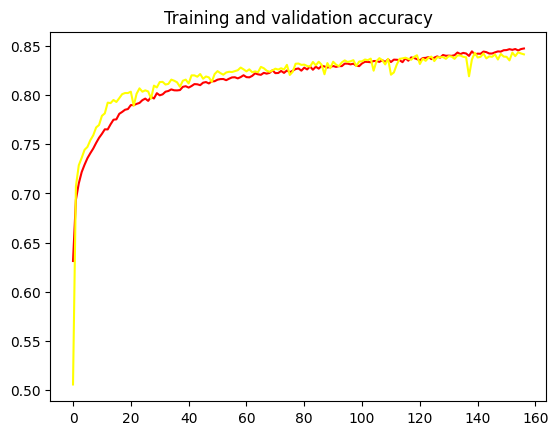

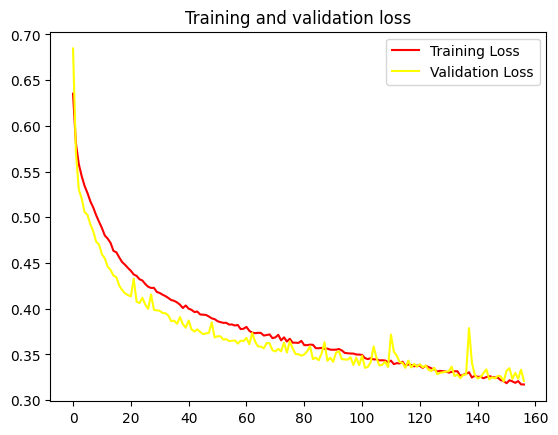

In [14]:
plot_loss_acc(history)

In [15]:
model.save('newmodel.h5')

In [16]:
v_loss, v_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {v_loss}')
print(f'Validation Accuracy: {v_accuracy}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.8340 - loss: 0.3307
Validation Loss: 0.32111579179763794
Validation Accuracy: 0.8413636088371277


In [17]:
import numpy as np
import os
from keras.models import load_model
from keras.preprocessing import image


model = load_model('newmodel.h5')


image_directory = TSTNAI


uploaded_files = os.listdir(image_directory)
A = 0
B = 0
for fn in uploaded_files:

    path = os.path.join(image_directory, fn)


    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)


    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)
    print(classes[0])

    B = B+1
    if classes[0] > 0.5:
        print(fn + " is a human art")
    else:
        print(fn + " is an AI generated")
        A=A+1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
[3.354543e-38]
Non-AI-Images--- (6917).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[1.]
17590.jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0.]
Non-AI-Images--- (1671).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1.]
Non-AI-Images--- (9345).jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0.]
Non-AI-Images--- (8130).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[1.]
528.jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1.]
Non-AI-Images--- (289).jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[1.]
10221.jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[1.]
Non-AI-Images--- (10061).jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.]
Non-AI-Images--- (4100).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0.]
Non-AI-Images--- (4121).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1.]
Non-AI-Images--- (14525).jpg is a hu

In [18]:
print(A/B)

0.25


In [19]:
import joblib

joblib.dump(model,'newmodel.joblib')

['newmodel.joblib']

In [20]:
import pickle

with open('newmodel.pkl', 'wb') as f:
    pickle.dump(model,f)

In [21]:
from keras.models import load_model


model = load_model('newmodel.h5')


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('newmodel.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
testing